In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8201,8770_02,Earth,True,F/1808/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walley Waderoachez,True
6165,6511_01,Earth,False,F/1348/P,TRAPPIST-1e,22.0,False,151.0,6.0,26.0,0.0,533.0,Katen Gainney,False
951,1012_01,Earth,True,G/149/P,TRAPPIST-1e,19.0,False,0.0,0.0,0.0,0.0,0.0,Valey Hubbarton,True
7029,7486_01,Earth,False,G/1210/P,55 Cancri e,14.0,False,0.0,184.0,16.0,1234.0,0.0,Katen Vandez,False
1920,2055_06,Earth,True,G/330/P,TRAPPIST-1e,11.0,False,0.0,0.0,0.0,0.0,0.0,Janee Canton,False
6263,6630_01,Earth,False,F/1270/S,TRAPPIST-1e,19.0,False,0.0,1044.0,0.0,2.0,4.0,Valex Singlents,True
5672,6026_01,Mars,False,F/1246/P,TRAPPIST-1e,41.0,False,982.0,64.0,380.0,0.0,0.0,Stray Prie,True
5939,6302_04,Earth,True,NaN,PSO J318.5-22,3.0,False,0.0,0.0,0.0,0.0,0.0,Debony Joycerton,True
4280,4560_01,Earth,False,G/744/S,TRAPPIST-1e,NaN,False,0.0,57.0,851.0,0.0,0.0,Daven Monsoney,True
2125,2278_01,Europa,True,C/80/P,55 Cancri e,18.0,False,0.0,0.0,NaN,0.0,0.0,Gemmam Crantiale,True


In [4]:
X,y=train.iloc[:,:-1],train.iloc[:,-1]

In [5]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,FunctionTransformer,OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

## Selcting Required Cols only

In [7]:
selector=ColumnTransformer([("selector","drop",[0,-1])],remainder="passthrough")

# Imputing Missing Values

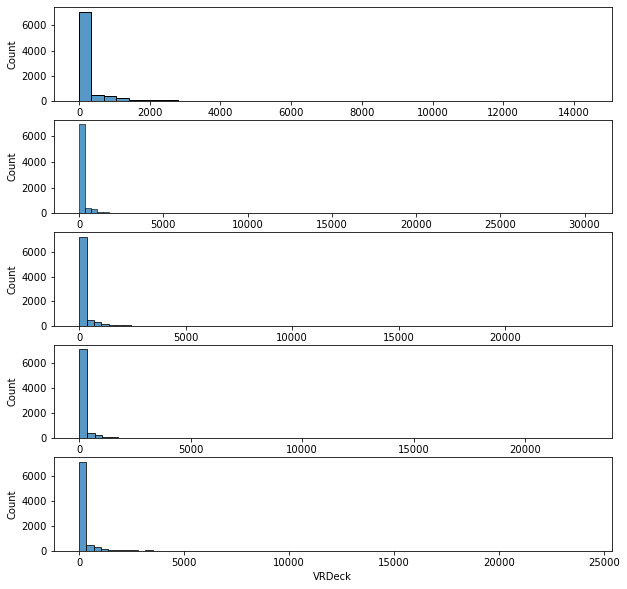

In [8]:
exp_cols=["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
fig,axes=plt.subplots(nrows=5,ncols=1,figsize=(10,10))
for idx,col in enumerate(exp_cols):
    sns.histplot(train[col],ax=axes[idx],binwidth=350)

In [9]:
# Since a lot of people have spent very little money it will be good to assume it as default value for behavior

In [10]:
# Replace Age with Median
# Replace VIP,HomePlanet,CryoSleep,Destination with most_frequent
imputer=ColumnTransformer([
    ('impute-[home,cabin]',SimpleImputer(strategy='most_frequent'),slice(0,4)),
    ('impute-age',SimpleImputer(strategy='median'),[4]),
    ('impute-others',SimpleImputer(strategy='most_frequent'),slice(5,None))
],remainder='passthrough')

In [11]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


## Engineer All Require Feature

In [12]:
def featureEngineering(df):
    df=pd.DataFrame(df)
#   Added tot-expenditure col
    df['total_expenditure']=df.iloc[:,7:12].sum(axis=1)
    
#   Add decks
    df["Deck"]=df.iloc[:,2].apply(lambda cab:cab[0])
    
#   Removed all not require expenditure cols
    df.drop(df.iloc[:,7:12],axis=1,inplace=True)

#   Added tot-expenditure col
    df.drop(df.iloc[:,[2]],axis=1,inplace=True)
    return df

In [13]:
feature_selector_transformer=FunctionTransformer(featureEngineering,validate=False)
featureSelector=ColumnTransformer([("mergeExpenditure",feature_selector_transformer,slice(0,X.shape[1]))],remainder="passthrough")

## Scaling Age Column

In [49]:
sc=StandardScaler()
# sc=MinMaxScaler()
scaler=ColumnTransformer([("scaler",sc,[3,5])],remainder="passthrough")

## Encode Categorical data

In [50]:
encoder=ColumnTransformer([("encode_categories",OneHotEncoder(drop="first",sparse=False),slice(2,None))],remainder="passthrough")

## Designing Model

In [51]:
# clf=RandomForestClassifier()
# clf=LogisticRegression()
clf=SVC()
# clf=DecisionTreeClassifier()

In [52]:
# LabelEncoding y-variable
le=LabelEncoder()
y_encoded=le.fit_transform(y)

In [53]:
pipe=Pipeline([
    ("selector",selector),
    ("imputer",imputer),
    ("featureSelector",featureSelector),
    ("scaler",scaler),
    ("encoder",encoder),
    ("classifier",clf)
])

In [54]:
pipe

Pipeline(steps=[('selector',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('selector', 'drop',
                                                  [0, -1])])),
                ('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute-[home,cabin]',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 4, None)),
                                                 ('impute-age',
                                                  SimpleImputer(strategy='median'),
                                                  [4]),
                                                 ('impute-others',
                                                  SimpleImputer(strate...
                                                  FunctionTransformer(func=<function featureEngineering at 0x000001ECCE8680D0>),
                                                  slice(0, 13, None))])),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [3, 5])])),
                ('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_categories',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  slice(2, None, None))])),
                ('classifier', SVC())])

In [55]:
pipe.fit(X,y_encoded)
y_train_pred=pipe.predict(X)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
from sklearn.metrics import classification_report
training_report=classification_report(y_encoded,y_train_pred)
print(training_report)

              precision    recall  f1-score   support

           0       0.69      0.86      0.77      4315
           1       0.82      0.63      0.71      4378

    accuracy                           0.74      8693
   macro avg       0.76      0.74      0.74      8693
weighted avg       0.76      0.74      0.74      8693



In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, cv=5)
scores.mean()

0.7378378378378379

## Now Checking its performance on test

In [58]:
test=pd.read_csv("test.csv")
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [59]:
test_pred=pipe.predict(test)
test_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [60]:
test["Transported"]=le.inverse_transform(test_pred)
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,False


In [61]:
# Creating a res.csv file with data
test[["PassengerId","Transported"]].to_csv("result.csv",index=False)

In [62]:
res=pd.read_csv("result.csv")
res

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False
